# GOLD PRICE PREDICATION USING RANDOM FOREST REGRESSOR



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

# Data Collection

In [2]:
data5=pd.read_csv('C:\\Users\\Dell\\Desktop\\Data Science\\gold price.csv')

In [3]:
data5.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
data5.sample(5)

,Date,SPX,GLD,USO,SLV,EUR/USD
276,4/13/2009,858.729980,87.879997,29.680000,12.57,1.327404
1802,2/29/2016,1932.229980,118.639999,9.000000,14.20,1.092395
1592,3/18/2015,2099.500000,112.370003,16.760000,15.36,1.059805
1765,1/5/2016,2016.709961,103.180000,10.660000,13.31,1.082755
407,11/24/2009,1105.650024,114.730003,38.580002,18.25,1.496670


In [5]:
print("Number of Rows",data5.shape[0])
print("Number of Columns",data5.shape[1])

Number of Rows 2290
Number of Columns 6


In [6]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
data5.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

#  Exploartory Data Analysis EDA

In [8]:
data5.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [9]:
corr=data5.corr()

In [10]:
corr

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


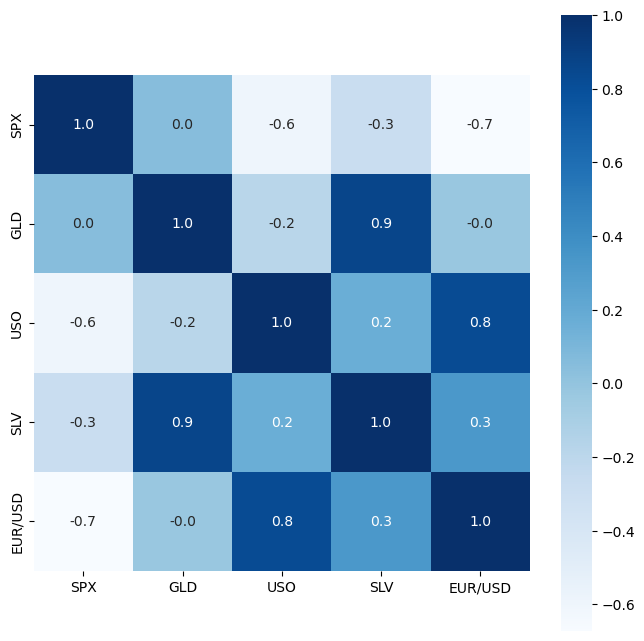

In [11]:
plt.figure(figsize=(8,8))
sns.heatmap(corr,cbar=True,square=True,fmt=".1f",annot=True,cmap="Blues")
plt.show()

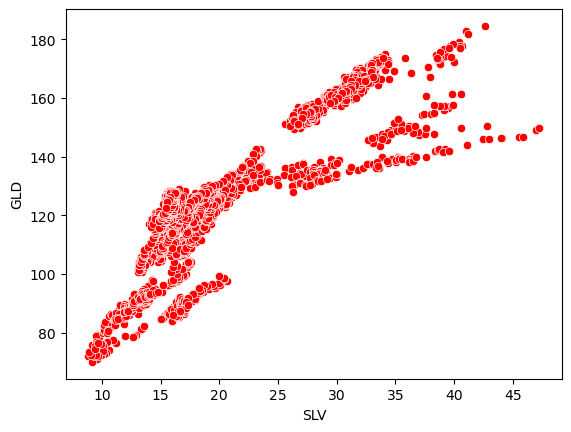

In [12]:
sns.scatterplot(x="SLV",y="GLD",data=data5,color="r")
plt.show()

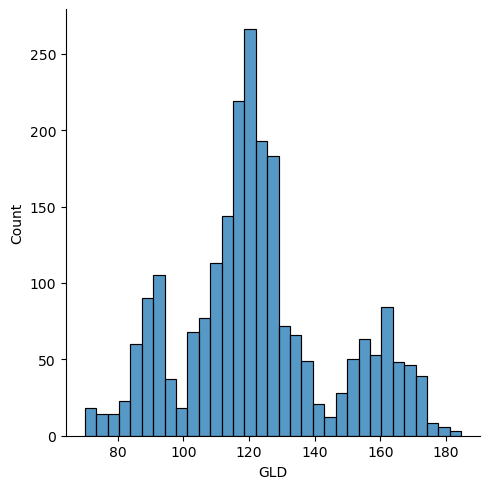

In [13]:
sns.displot(x="GLD",data=data5)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


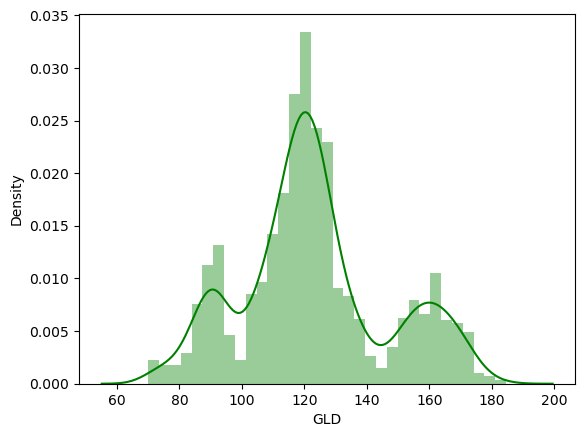

In [14]:
sns.distplot(data5["GLD"],color="green")
plt.show()

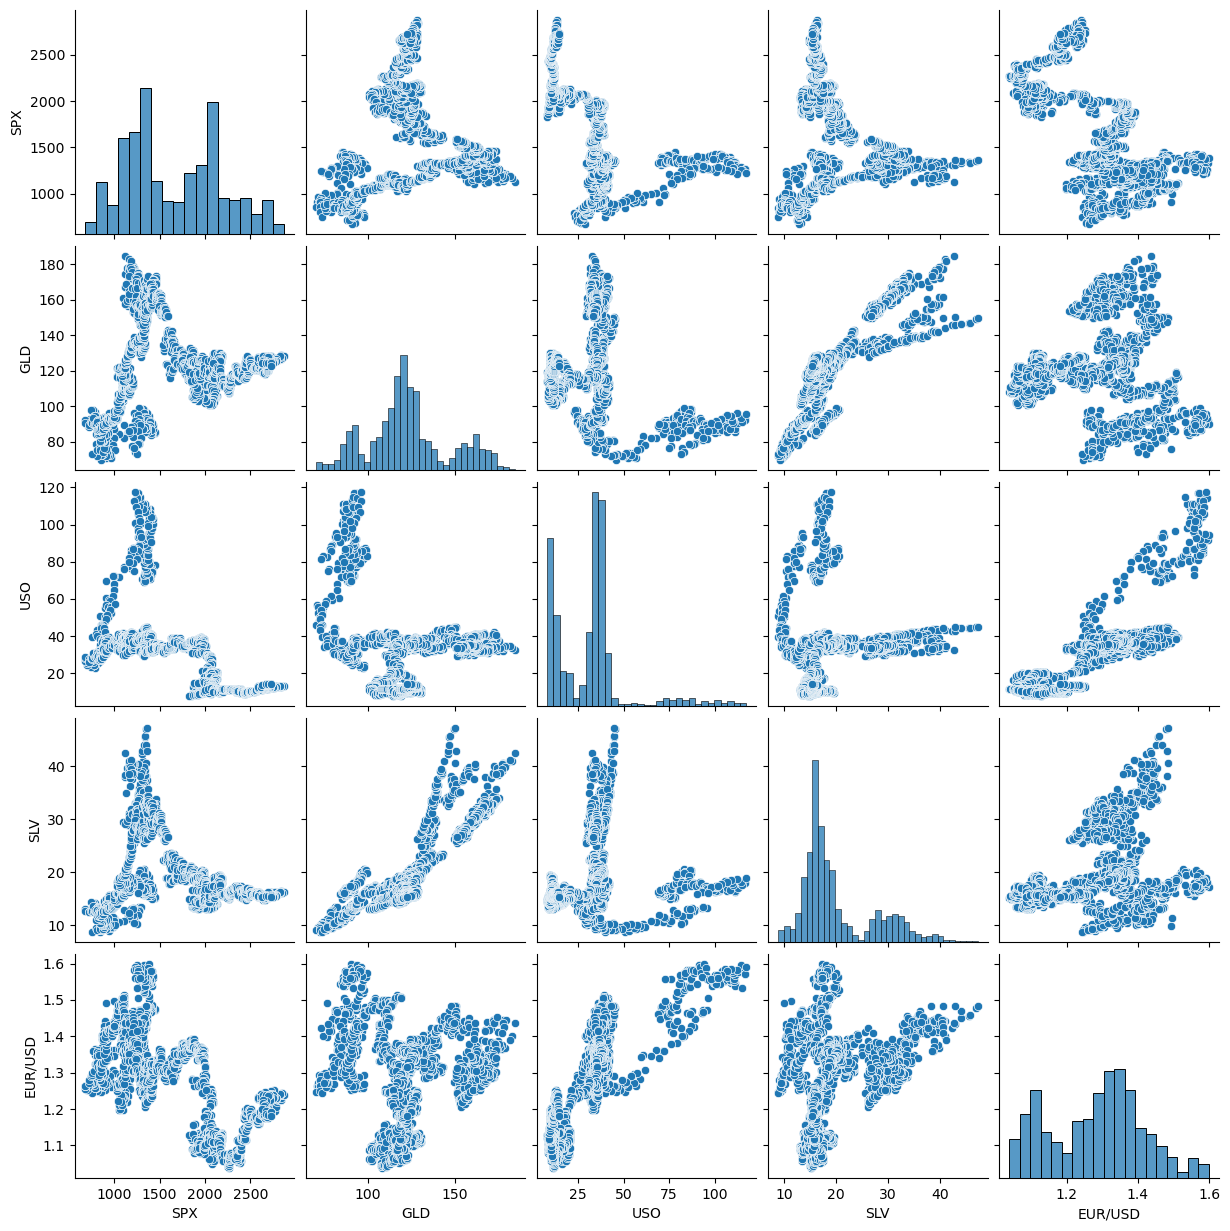

In [26]:
sns.pairplot(data=data5)
plt.show()

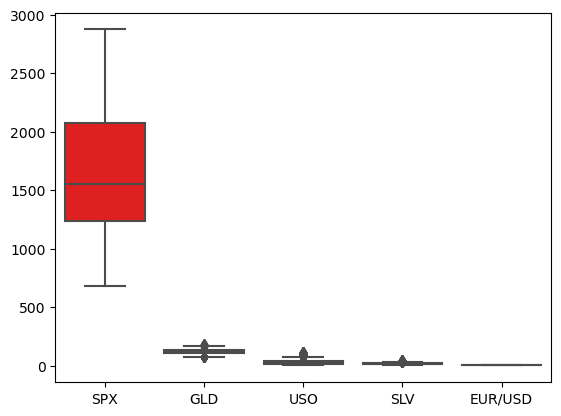

In [29]:
sns.boxplot(data=data5,color="red")
plt.show()

# Feature Engneering

In [15]:
x=data5.drop(["Date","GLD"],axis=1)
y=data5["GLD"]

In [16]:
print(x)
print(y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [17]:
y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [19]:
print(x.shape,x_train.shape,x_test.shape)

(2290, 4) (1832, 4) (458, 4)


# Model Deveploment

In [20]:
model=RandomForestRegressor(n_estimators=100)

In [21]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [22]:
model.score(x_train,y_train)*100

99.84287071429617

In [23]:
model.score(x_test,y_test)*100


98.89378010215891

# Model Evaluation

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [33]:
y_pred = model.predict(x_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Squared Error (MSE): 5.83
Root Mean Squared Error (RMSE): 2.42
Mean Absolute Error (MAE): 1.33
R-squared (R2) Score: 0.99
